In [1]:
import json
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
from scipy.optimize import curve_fit
from uncertainties import ufloat
import numpy as np

import matplotlib.patheffects as peff

def fnToSymbol(fn):
    if "La" in fn or "Pr" in fn:
        return "v"
    elif "-C3" in fn:
        return "o"
    else:
        return "s"

def fnToColor(fn):
    if "V" in fn:
        return "C3"
    else:
        return "C0"
 

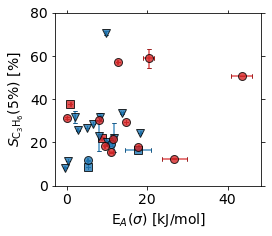

In [2]:
fig, ax = plt.subplots(figsize=(4, 3.5))

for folder in ["other", "perovskite", "handbook"]:
    files = [i for i in os.listdir(os.path.join("..", "data", folder)) if i.endswith("json")]
    for fn in files:
        with open(os.path.join("..", "data", folder, fn)) as infile:
            d = json.load(infile)
            try:
                dl, cl, bl = ax.errorbar(d["results"]["EA(σ)"][0], d["results"]["Spropylene(5%)"][0],
                                         xerr=d["results"]["EA(σ)"][1], yerr=d["results"]["Spropylene(5%)"][1],
                                         color=fnToColor(d["metadata"]["sample"]["name"]), capsize=2, 
                                         marker=fnToSymbol(d["metadata"]["sample"]["name"]), 
                                         markeredgecolor="k", markersize=8, alpha=0.8)
                for c in cl:
                    c.set_path_effects([peff.withStroke(linewidth=1, foreground='k')])
            except KeyError:
                continue
ax.set_xlabel(r"E$_A(\sigma)$ [kJ/mol]")
ax.set_ylabel(r"$S_{\mathrm{C}_3\mathrm{H}_6}$(5%) [%]")
ax.tick_params(axis="x", top=True, labeltop=False, bottom=True, labelbottom=True)
ax.tick_params(axis="y", left=True, labelleft=True, right=True, labelright=False)
ax.set_ylim(bottom=0, top=80)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join("..", "outputs", "Ea_S.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")

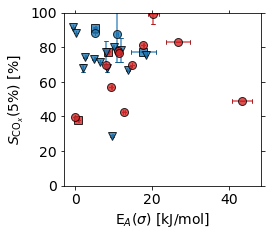

In [3]:
fig, ax = plt.subplots(figsize=(4, 3.5))

for folder in ["other", "perovskite", "handbook"]:
    files = [i for i in os.listdir(os.path.join("..", "data", folder)) if i.endswith("json")]
    for fn in files:
        with open(os.path.join("..", "data", folder, fn)) as infile:
            d = json.load(infile)
            try:
                dl, cl, bl = ax.errorbar(d["results"]["EA(σ)"][0], d["results"]["SCOx(5%)"][0],
                                         xerr=d["results"]["EA(σ)"][1], yerr=d["results"]["SCOx(5%)"][1],
                                         color=fnToColor(d["metadata"]["sample"]["name"]), capsize=2, 
                                         marker=fnToSymbol(d["metadata"]["sample"]["name"]), 
                                         markeredgecolor="k", markersize=8, alpha=0.8)
                for c in cl:
                    c.set_path_effects([peff.withStroke(linewidth=1, foreground='k')])
            except KeyError:
                continue
ax.set_xlabel(r"E$_A(\sigma)$ [kJ/mol]")
ax.set_ylabel(r"$S_{\mathrm{CO}_x}$(5%) [%]")
ax.tick_params(axis="x", top=True, labeltop=False, bottom=True, labelbottom=True)
ax.tick_params(axis="y", left=True, labelleft=True, right=True, labelright=False)
ax.set_ylim(bottom=0, top=100)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join("..", "outputs", "Ea_SCOx.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")